In [201]:
#https://github.com/fastai/fastbook/blob/master/04_mnist_basics.ipynb
#https://www.youtube.com/watch?v=hBBOjCiFcuo
import fastbook

In [202]:
from fastai.vision.all import *
from fastbook import *

In [203]:
#matplotlib runtime configuration
#https://matplotlib.org/stable/users/explain/customizing.html
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.rc.html
matplotlib.rc('image', cmap='Greys')

In [204]:
path = untar_data(URLs.MNIST_SAMPLE)

In [205]:
Path.BASE_PATH = path

In [206]:
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [207]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [208]:
#new sorted list
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [209]:
im_path = threes[1]
im3 = Image.open(im_path)
im3

In [210]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [211]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [212]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [213]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(seven_tensors),len(three_tensors)

(6265, 6131)

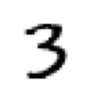

In [214]:
show_image(three_tensors[1]);

In [215]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
#shape is the size of each axis of a tensor
stacked_threes.shape

torch.Size([6131, 28, 28])

In [216]:
#length of a tensor is its rank
len(stacked_threes.shape)

3

In [217]:
stacked_threes.ndim

3

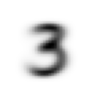

In [218]:
#calculate the "ideal" three e.g. the average three.
mean3 = stacked_threes.mean(0)
show_image(mean3);

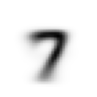

In [219]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

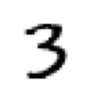

In [220]:
a_3 = stacked_threes[1]
show_image(a_3);

In [221]:
#L1 Norm or Mean Absolute difference
dist_3_abs = (a_3 - mean3).abs().mean()
#L2 Norm or Root Mean Square Error RMSE
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [222]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [223]:
#pytorch provides both these loss function inside torch.nn.functional
#pytorch recommends importing torch.nn.functional as F
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [224]:
#NumPy Arrays and PyTorch Tensors
data = [[1,2,3],[4,5,6]]
arr = array(data)
tns = tensor(data)

In [225]:
arr #numpy

array([[1, 2, 3],
       [4, 5, 6]])

In [226]:
tns #pytorch

tensor([[1, 2, 3],
        [4, 5, 6]])

In [227]:
tns[1]

tensor([4, 5, 6])

In [228]:
tns[:,1]

tensor([2, 5])

In [229]:
tns[1,1:3]

tensor([5, 6])

In [230]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [231]:
tns.type()

'torch.LongTensor'

In [232]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [233]:
#validation tensors, not absolutely necessary for the case of
#the simple model because it has no trained components
#but good practice
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                           for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape 

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [234]:
#calculate the distance between two images
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [235]:
#broadcasting
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1229, 0.1061, 0.1327,  ..., 0.1308, 0.1133, 0.1315]),
 torch.Size([1010]))

In [236]:
tensor([1,2,3]) + tensor(1)

tensor([2, 3, 4])

In [237]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [238]:
#function to check wheter image is closer to ideal 3 or ideal 7
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [239]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [240]:
is_3(valid_3_tens)

tensor([ True,  True, False,  ...,  True,  True,  True])

In [241]:
#calculate accuracy
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = 1 - is_3(valid_7_tens).float().mean()

accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2 

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [242]:
#Stochastic Gradient Descent (sgd)
def f(x): return x**2

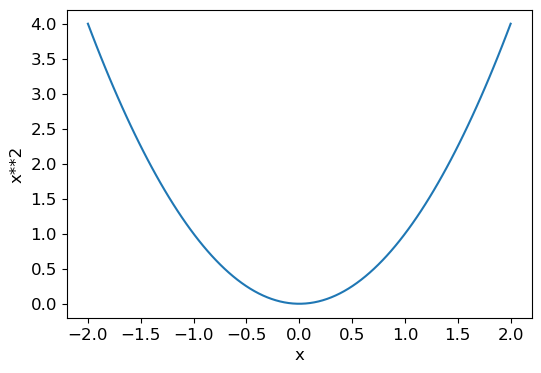

In [243]:
plot_function(f, 'x', 'x**2')

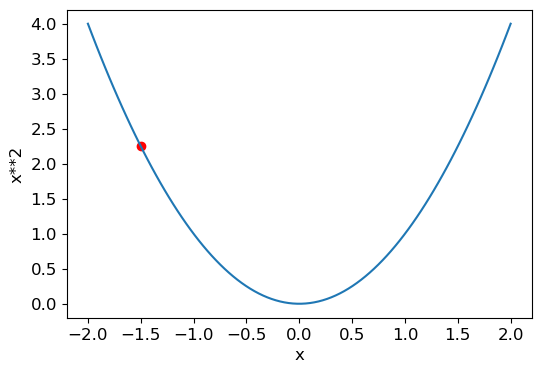

In [244]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [245]:
xt = tensor(3.).requires_grad_()

In [246]:
xt

tensor(3., requires_grad=True)

In [247]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [248]:
#calculate the gradient at x = 3
yt.backward()

In [249]:
xt.grad

tensor(6.)

In [250]:
xt = tensor([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [251]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [252]:
yt.backward()
xt.grad
#https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression).
#https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent#:~:text=Thus%2C%20the%20negative%20of%20the,are%20used%20in%20gradient%20descent.

tensor([ 6.,  8., 20.])

In [253]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [254]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1 

In [255]:
speed

tensor([71.8699, 55.8124, 41.4540, 33.6639, 23.6740, 21.1879, 10.6493,  2.5067,  0.9695,  1.4382,  2.3872,  8.6551,  5.4715,  7.4692, 10.0414, 20.4443, 32.7404, 43.4222, 55.7670, 69.9165])

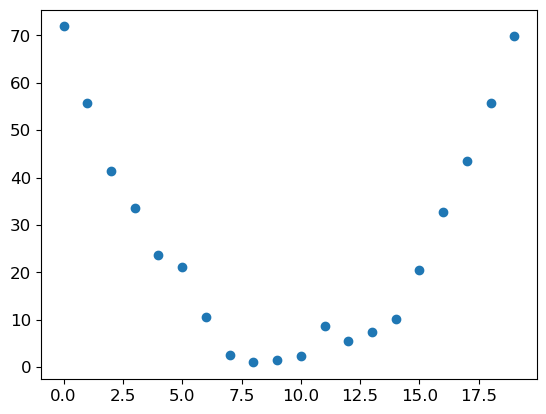

In [256]:
plt.scatter(time,speed)

In [257]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [258]:
#loss function
def mse(preds, targets): return ((preds - targets)**2).mean()

In [259]:
#step 1 initialize parameters
params = torch.randn(3).requires_grad_()

In [260]:
orig_params = params.clone()

In [261]:
#step 2 calculate the predictions
preds = f(time, params)

In [262]:
#define function to show how close predictions are to the targets
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    #
    #ax.set_ylim(-300,100)

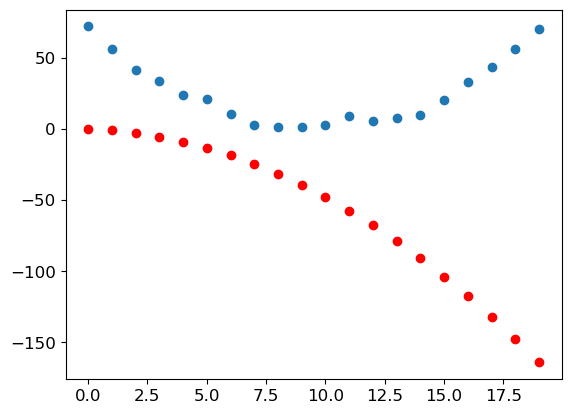

In [263]:
show_preds(preds)

In [264]:
#step 3 calculate the loss
loss = mse(preds, speed)
loss

tensor(10679.9434, grad_fn=<MeanBackward0>)

In [265]:
#step 4 calculate the gradients i.e. calculate an approximation of how the parameters need to change
loss.backward()
params.grad

tensor([-33543.1094,  -2157.5024,   -167.4232])

In [266]:
params.grad * 1e-5

tensor([-0.3354, -0.0216, -0.0017])

In [267]:
params

tensor([-0.4279, -0.5007, -0.1307], requires_grad=True)

In [268]:
#step 5 step the weights. update the parameters based on the gradients just calculated
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [269]:
#check if the loss has improved
preds = f(time,params)
mse(preds, speed)

tensor(2573.4253, grad_fn=<MeanBackward0>)

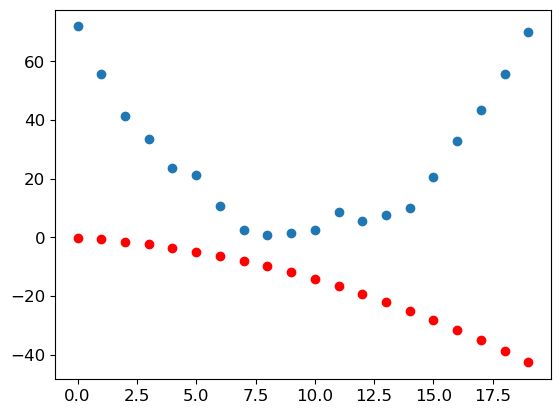

In [270]:
show_preds(preds)

In [271]:
#need to apply this a few times, so put it in a function so we can loop
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [272]:
#step 6 Repeat the process
for i in range(10): apply_step(params)

2573.42529296875
1039.421630859375
749.137939453125
694.2039794921875
683.8052978515625
681.8340454101562
681.4576416015625
681.3829345703125
681.3653564453125
681.3585815429688


In [273]:
params = orig_params.detach().requires_grad_()

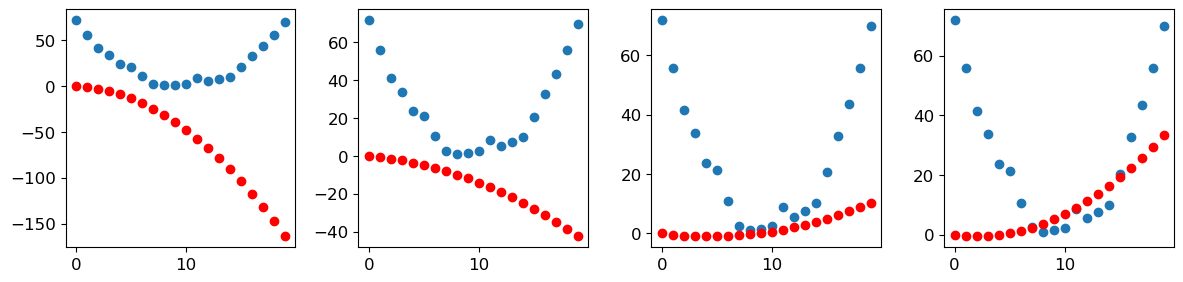

In [274]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [275]:
#step 7 Stop

### Summarizing Gradient Descent

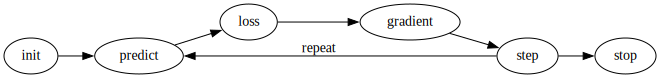

In [276]:
#hide_input
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

## The MNist Loss Function  

In [277]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [278]:
train_x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [291]:
tensor([1]*len(threes) + [0]*len(sevens))

tensor([1, 1, 1,  ..., 0, 0, 0])

In [298]:
tensor([1]*len(threes) + [0]*len(sevens)).shape

torch.Size([12396])

In [302]:
tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(0).shape

torch.Size([1, 12396])

In [303]:
tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1).shape

torch.Size([12396, 1])

In [304]:
# Add label to each image.
# 1 for 3s
# 0 for 7s
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)


In [305]:
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [306]:
#https://pytorch.org/docs/stable/generated/torch.unsqueeze.html
x = torch.tensor([1,2,3,4])
x

tensor([1, 2, 3, 4])

In [307]:
torch.unsqueeze(x, 0)

tensor([[1, 2, 3, 4]])

In [308]:
torch.unsqueeze(x, 1)

tensor([[1],
        [2],
        [3],
        [4]])

In [309]:
y = torch.tensor([[1,2],[3,4],[5,6]])
y

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [310]:
torch.unsqueeze(y,0)

tensor([[[1, 2],
         [3, 4],
         [5, 6]]])

In [288]:
torch.unsqueeze(y,1)

tensor([[[1, 2]],

        [[3, 4]],

        [[5, 6]]])